In [1]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [2]:
model = pybamm.lithium_ion.DFN(options={"thermal": "lumped"})
param = pybamm.ParameterValues("OKane2023")
param.update({"Ambient temperature [K]": 283.15})
param.update({"Initial temperature [K]": 283.15})
exp = pybamm.Experiment(["Discharge at 1C until 2.5 V"])

pts200 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 200,  # negative particle
    "r_p": 20,  # positive particle
}

sim200 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts200)
solution200 = sim200.solve(calc_esoh=False)

pts100 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 20,  # positive particle
}

sim100 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts100)
solution100 = sim100.solve(calc_esoh=False)

pts60 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 60,  # negative particle
    "r_p": 20,  # positive particle
}

sim60 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts60)
solution60 = sim60.solve(calc_esoh=False)

pts50 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 50,  # negative particle
    "r_p": 20,  # positive particle
}

sim50 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts50)
solution50 = sim50.solve(calc_esoh=False)

pts40 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 40,  # negative particle
    "r_p": 20,  # positive particle
}

sim40 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts40)
solution40 = sim40.solve(calc_esoh=False)

pts30 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 30,  # negative particle
    "r_p": 20,  # positive particle
}

sim30 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts30)
solution30 = sim30.solve(calc_esoh=False)

pts20 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 20,  # negative particle
    "r_p": 20,  # positive particle
}

sim20 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts20)
solution20 = sim20.solve(calc_esoh=False)

In [3]:
t200 = solution200["Time [s]"].entries
t100 = solution100["Time [s]"].entries
t60 = solution60["Time [s]"].entries
t50 = solution50["Time [s]"].entries
t40 = solution40["Time [s]"].entries
t30 = solution30["Time [s]"].entries
t20 = solution20["Time [s]"].entries
T200 = solution200["Volume-averaged cell temperature [K]"].entries
T100 = solution100["Volume-averaged cell temperature [K]"].entries
T60 = solution60["Volume-averaged cell temperature [K]"].entries
T50 = solution50["Volume-averaged cell temperature [K]"].entries
T40 = solution40["Volume-averaged cell temperature [K]"].entries
T30 = solution30["Volume-averaged cell temperature [K]"].entries
T20 = solution20["Volume-averaged cell temperature [K]"].entries

In [4]:
Q200 = solution200["Discharge capacity [A.h]"].entries
V200 = solution200["Terminal voltage [V]"].entries
Q100 = solution100["Discharge capacity [A.h]"].entries
V100 = solution100["Terminal voltage [V]"].entries
Q60 = solution60["Discharge capacity [A.h]"].entries
V60 = solution60["Terminal voltage [V]"].entries
Q50 = solution50["Discharge capacity [A.h]"].entries
V50 = solution50["Terminal voltage [V]"].entries
Q40 = solution40["Discharge capacity [A.h]"].entries
V40 = solution40["Terminal voltage [V]"].entries
Q30 = solution30["Discharge capacity [A.h]"].entries
V30 = solution30["Terminal voltage [V]"].entries
Q20 = solution20["Discharge capacity [A.h]"].entries
V20 = solution20["Terminal voltage [V]"].entries
print(f"With 200 points, discharge capacity is {np.max(Q200)} Ah.")
print(f"With 100 points, discharge capacity is {np.max(Q100)} Ah.")
print(f"With 60 points, discharge capacity is {np.max(Q60)} Ah.")
print(f"With 50 points, discharge capacity is {np.max(Q50)} Ah.")
print(f"With 40 points, discharge capacity is {np.max(Q40)} Ah.")
print(f"With 30 points, discharge capacity is {np.max(Q30)} Ah.")
print(f"With 20 points, discharge capacity is {np.max(Q20)} Ah.")

With 200 points, discharge capacity is 4.56061609020648 Ah.
With 100 points, discharge capacity is 4.561012855774242 Ah.
With 60 points, discharge capacity is 4.561502207061766 Ah.
With 50 points, discharge capacity is 4.561661990123369 Ah.
With 40 points, discharge capacity is 4.56188580925496 Ah.
With 30 points, discharge capacity is 4.561054512678596 Ah.
With 20 points, discharge capacity is 4.497576103746515 Ah.


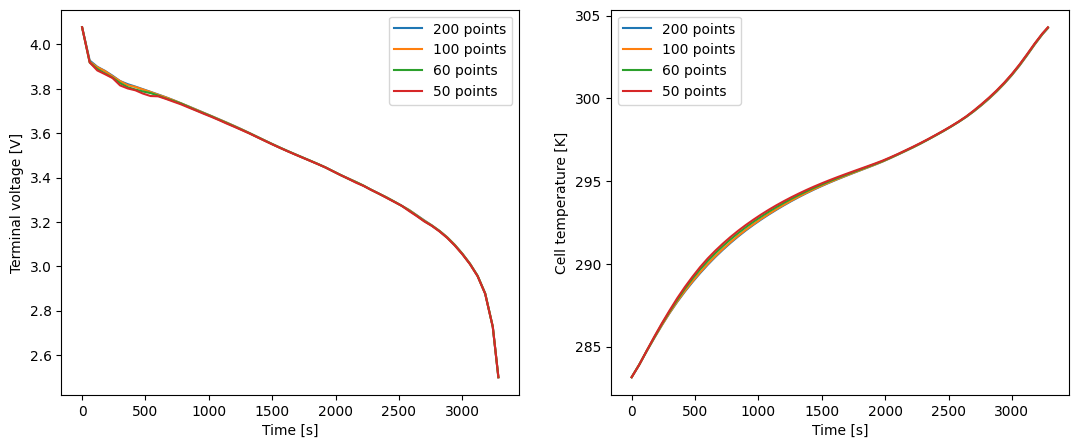

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,5))
ax1.plot(t200,V200,label="200 points")
ax1.plot(t100,V100,label="100 points")
ax1.plot(t60,V60,label="60 points")
ax1.plot(t50,V50,label="50 points")
#ax1.plot(t40,V40,label="40 points")
#ax1.plot(t30,V30,label="30 points")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Terminal voltage [V]")
ax1.legend()
ax2.plot(t200,T200,label="200 points")
ax2.plot(t100,T100,label="100 points")
ax2.plot(t60,T60,label="60 points")
ax2.plot(t50,T50,label="50 points")
#ax2.plot(t40,T40,label="40 points")
#ax2.plot(t30,T30,label="30 points")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Cell temperature [K]")
ax2.legend()
plt.savefig("/mnt/c/Users/sokane/pybamm_data/mesh_refinement/uniform_1C_discharge_283K.pdf")
plt.show()

In [6]:
path = '/mnt/c/Users/sokane/pybamm_data/mesh_refinement/'
solution60.save(path+'uniform60_1C_discharge_283K.pkl')

In [ ]:
#t200_CV = solution200.cycles[2]["Time [s]"].entries
#t150_CV = solution150.cycles[2]["Time [s]"].entries
#t120_CV = solution120.cycles[2]["Time [s]"].entries
t100_CV = solution100.cycles[2]["Time [s]"].entries
t60_CV = solution60.cycles[2]["Time [s]"].entries
t30_CV = solution30.cycles[2]["Time [s]"].entries
#I200 = solution200.cycles[2]["Current [A]"].entries
#I150 = solution150.cycles[2]["Current [A]"].entries
#I120 = solution120.cycles[2]["Current [A]"].entries
I100 = solution100.cycles[2]["Current [A]"].entries
I60 = solution60.cycles[2]["Current [A]"].entries
I30 = solution30.cycles[2]["Current [A]"].entries
#Delta_t_CV_120 = t120_CV[-1]-t120_CV[0]
#Delta_t_CV_100 = t100_CV[-1]-t100_CV[0]
#print(f"For 120 points, CV phase lasts experiment ends at {Delta_t_CV_120} seconds.")
#print(f"For 100 points, CV phase lasts experiment ends at {Delta_t_CV_100} seconds.")

In [ ]:
fig, ax = plt.subplots()
#ax.plot(t200_CV,I200,label="200 points")
#ax.plot(t150_CV,I150,label="150 points")
#ax.plot(t120_CV,I120,label="120 points")
ax.plot(t100_CV,I100,label="100 points")
ax.plot(t60_CV,I60,label="60 points")
#ax.plot(t30_CV,I30,label="30 points")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Current [A]")
ax.legend()
plt.show()